# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

In [14]:
import funciones as func
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = func.load_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## Dataset *Diabetes* – Descripción de las columnas

> **Filas:** 442  **Columnas:** 11 (10 predictoras **escaladas** + 1 objetivo **sin escalar**)  **Valores nulos:** ninguno

| #  | Columna | Descripción (variable original) |
|----|---------|---------------------------------|
| 0  | **age** | Edad del paciente en años (centrada y escalada). |
| 1  | **sex** | Sexo biológico (0 = mujer, 1 = hombre). <br/>*Tras la estandarización los valores se centran en ≈ −0.04 y +0.05, por eso no ves 0/1 exactos.* |
| 2  | **bmi** | Índice de Masa Corporal, **BMI** = peso / altura². |
| 3  | **bp**  | Presión arterial media (Mean Arterial Pressure). |
| 4  | **s1**  | Colesterol total sérico, **TC**. |
| 5  | **s2**  | Colesterol LDL, “malo”, **LDL**. |
| 6  | **s3**  | Colesterol HDL, “bueno”, **HDL**. |
| 7  | **s4**  | Cociente Colesterol total / HDL, **TCH**. |
| 8  | **s5**  | Logaritmo de triglicéridos séricos, **LTG**. |
| 9  | **s6**  | Nivel de glucosa en sangre, **GLU**. |
| 10 | **target** | **Progresión de la enfermedad** un año después de las mediciones (variable continua, **no escalada** 

- Las 10 features ya vienen **estandarizadas**   
- El vector **`target`** mantiene su escala original   



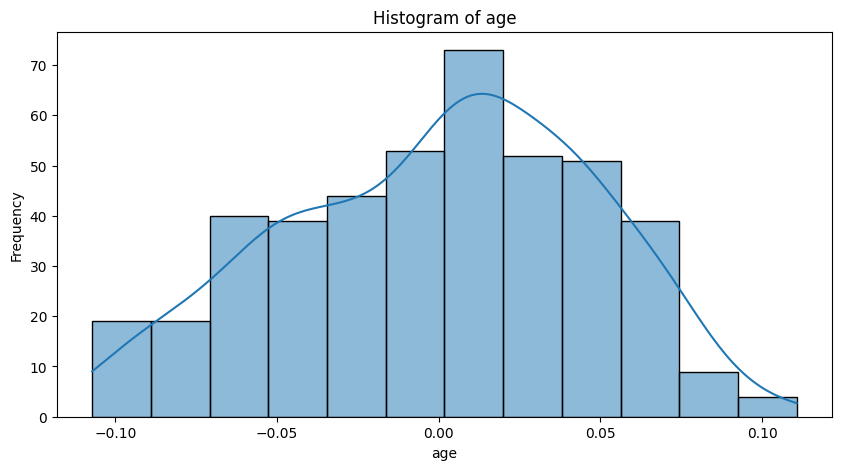

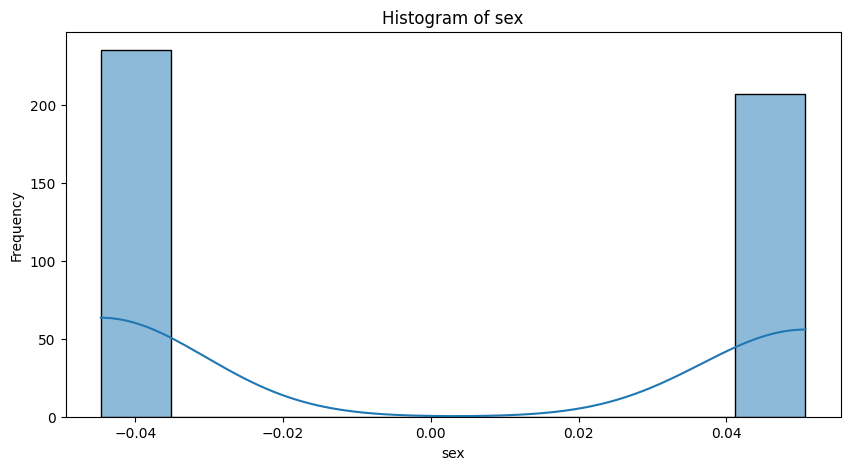

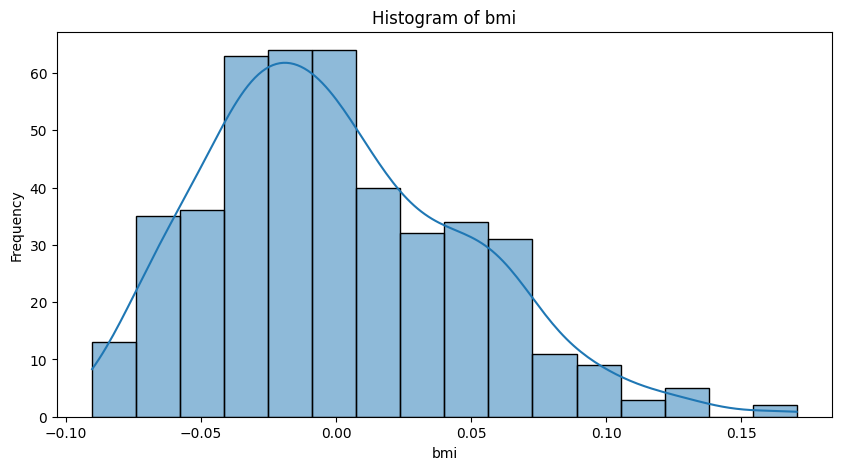

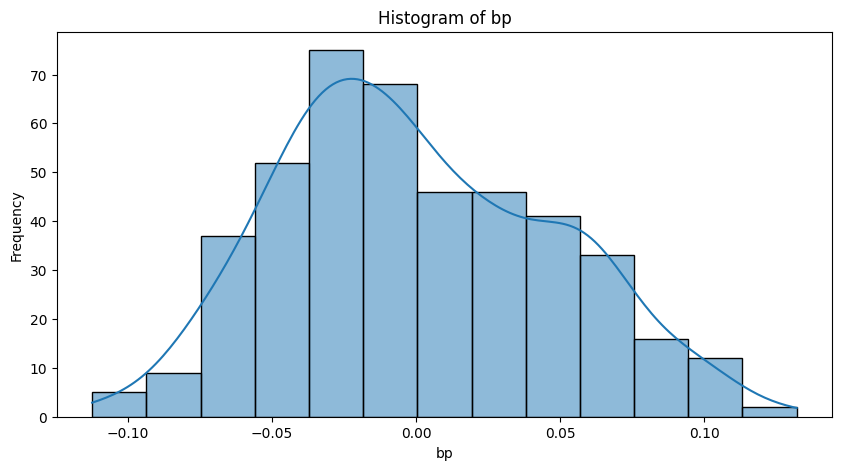

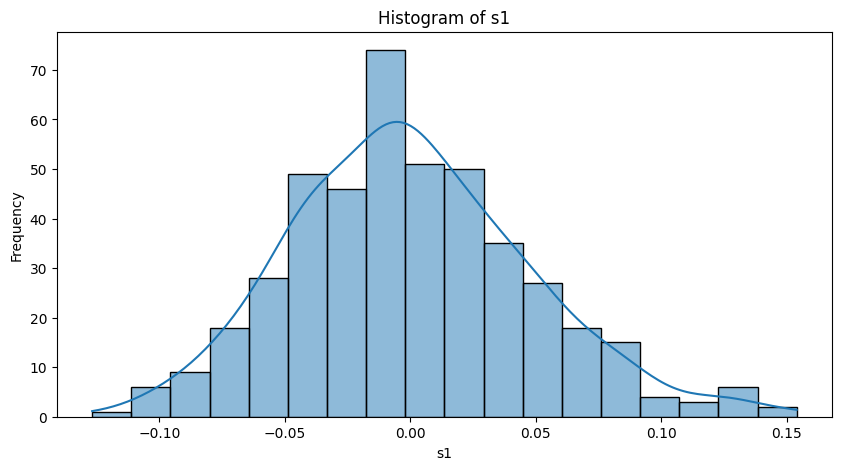

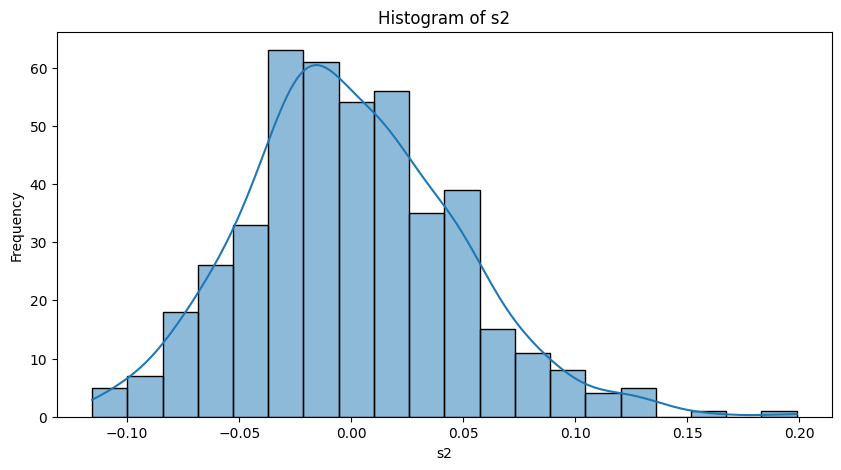

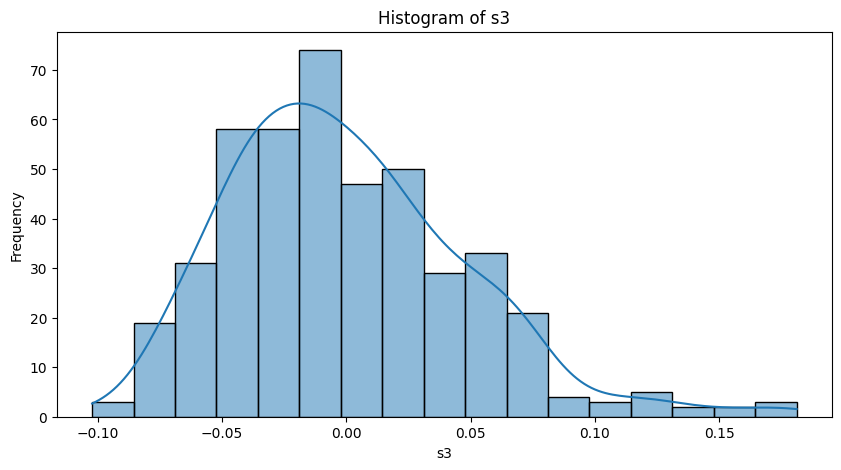

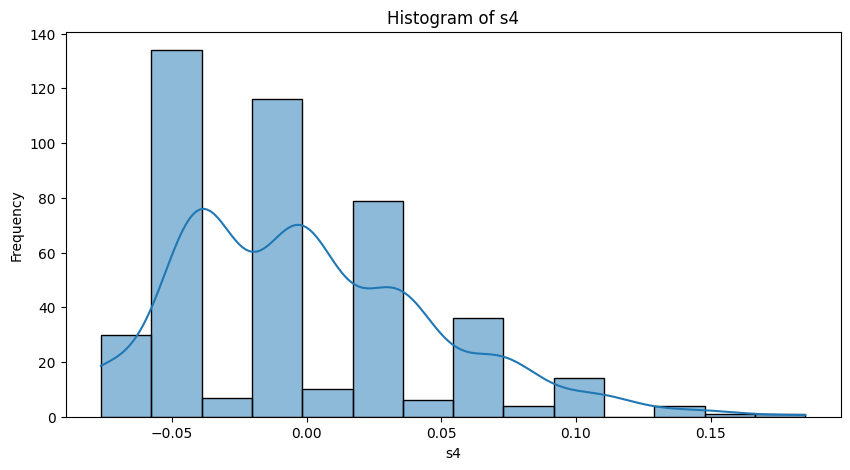

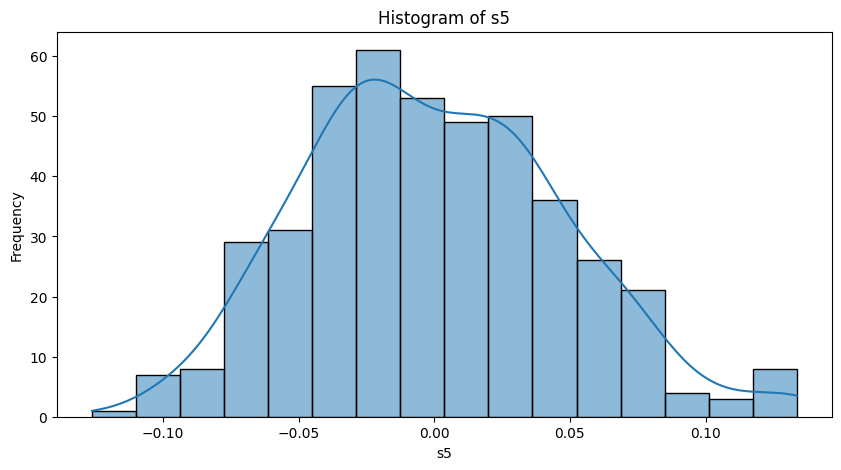

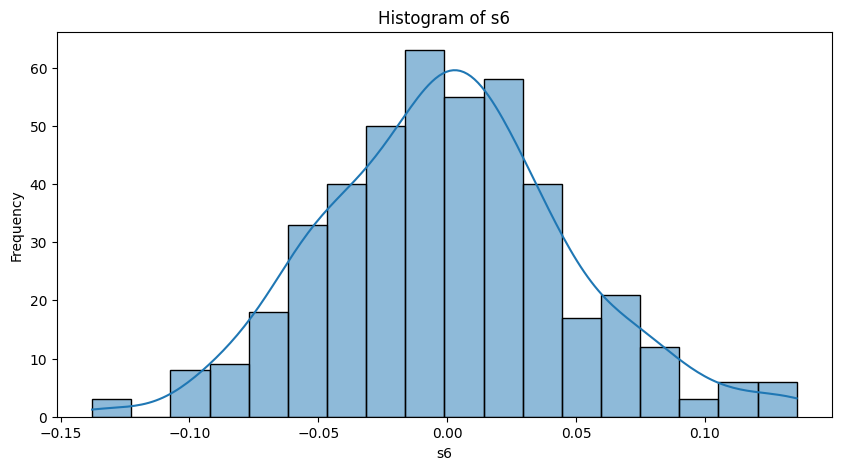

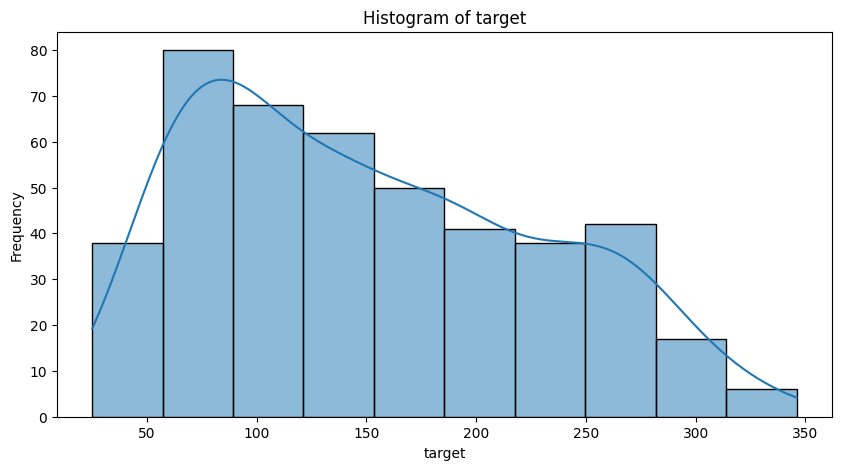

In [5]:
func.show_histogram(df)

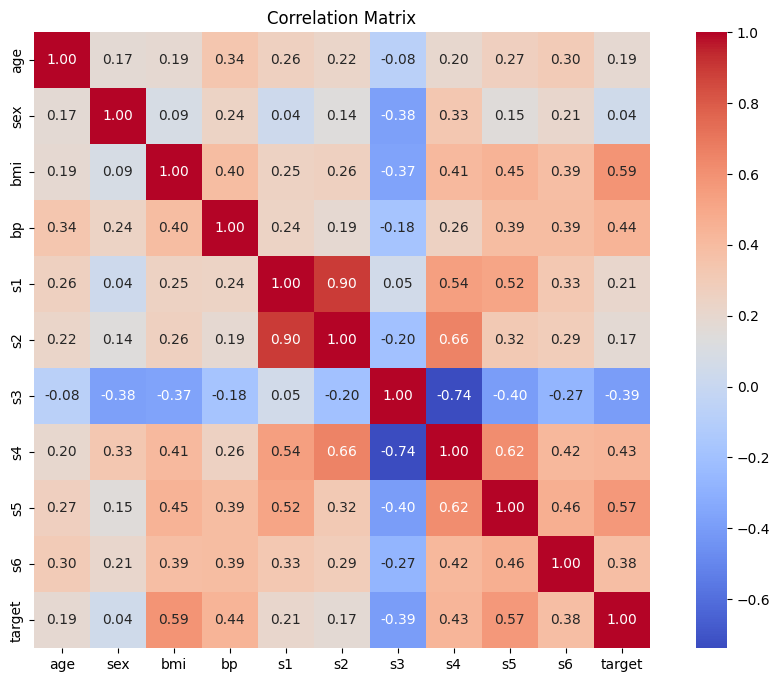

In [6]:
func.show_correlation_matrix(df)

In [7]:
X_train, X_test, y_train, y_test = func.split_data(df)

In [15]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

mse  = mean_squared_error(y_test, y_pred)   
rmse = np.sqrt(mse)                        
r2   = r2_score(y_test, y_pred)

In [16]:
print(f"RMSE Test : {rmse:.2f}")
print(f"R² Test   : {r2:.2f}")

RMSE Test : 53.85
R² Test   : 0.45


## Generar .py de funciones y main con al menos dos argumentos de entrada.

## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run